# View Effect of Prompts on Output

In [10]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from IPython.display import clear_output
from matplotlib import pyplot as plt
import numpy as np
np.set_printoptions(precision=2) 
np.set_printoptions(linewidth=160)
%config InlineBackend.print_figure_kwargs={'facecolor' : "w", 'bbox_inches': 'tight'}

from matplotlib.font_manager import FontProperties


import pickle
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'
from IPython.display import Markdown


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Data

In [11]:
# open the file in read mode
with open('../test_prompt.pkl', 'rb') as file:
    # load the contents of the file
    data = pickle.load(file)

# print the data
data = np.array(data)
flower, straight = data

In [15]:
def add_rectangle_around_box(ax, bp, box_ranges, padding=0.1):
    for i, box in enumerate(bp['boxes']):
        box_coords = np.array([box.get_xdata(), box.get_ydata()]).T
        x_min = -padding + box_coords[0, 0]
        x_max = padding + box_coords[2, 0] 
        y_min = box_ranges[i][0]
        y_max = box_ranges[i][1]
        rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=1, edgecolor='blue', facecolor='cornflowerblue', alpha=0.2)
        ax.add_patch(rect)
    ax.legend([rect], ["True Threshold"], loc="upper left")


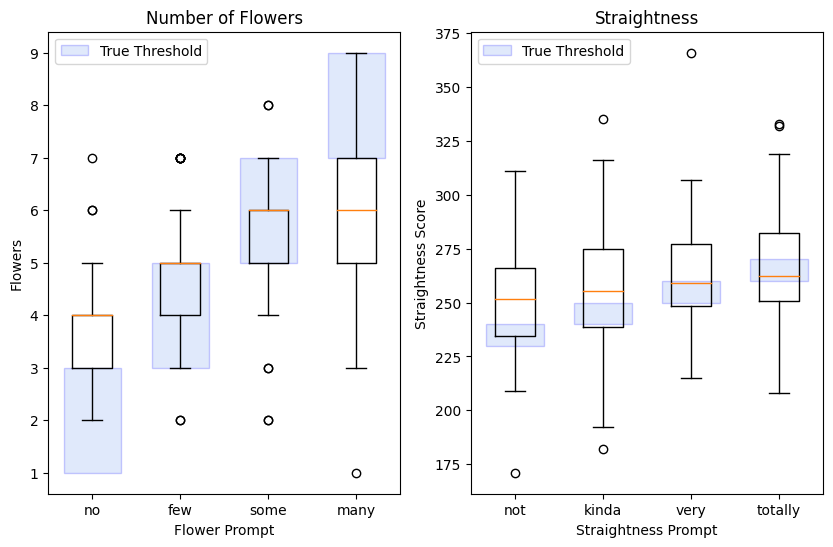

**Prompt Responsiveness:** Each combination of flower and straightness prompts (4x4) 
             is used 16 times (256 total) with an image dimensions (14x100).
             Each plot is the results from collected flower or straightness prompts
             for a total of 64 points (256/4) each. 
             The true threshold is shown in blue -- in a perfect response all results would be in this band.
             *Takeaway*: The model responds to the prompts but are pulled toward middle values.
             These mean values are heavily overrepresented in the training data.
          

In [19]:
prompt_flower = ["no", "few", "some", "many"]
prompt_straight = ["not", "kinda", "very", "totally"]
n_rows = len(prompt_flower)
n_cols = len(prompt_straight)

box_flower   = [ [1,3], [3,5], [5,7], [7,9] ]
box_straight = [ [230,240], [240,250], [250,260] , [260,270]]


                

# Display Box Plots
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# Flower Scores
flower_data = [np.array(flower)[j, :, :].flatten() for j in range(n_cols)]
bp = ax[0].boxplot(flower_data)
add_rectangle_around_box(ax[0], bp, box_flower) 
ax[0].set_title("Number of Flowers")
ax[0].set_xlabel("Flower Prompt")
ax[0].set_xticks(range(1, n_rows + 1))
ax[0].set_xticklabels(prompt_flower)
ax[0].set_ylabel("Flowers")

# Straightness Scores
straight_data = [np.array(straight)[:, j, :].flatten() for j in range(n_cols)]
bp = ax[1].boxplot(straight_data)
add_rectangle_around_box(ax[1], bp, box_straight)
ax[1].set_title("Straightness")
ax[1].set_xlabel("Straightness Prompt")
ax[1].set_xticks(range(1, n_cols + 1))
ax[1].set_xticklabels(prompt_straight)
ax[1].set_ylabel("Straightness Score")

heading = "**Prompt Responsiveness:** "
caption = """Each combination of flower and straightness prompts (4x4) 
             is used 16 times (256 total) with an image dimensions (14x100).
             Each plot is the results from collected flower or straightness prompts
             for a total of 64 points (256/4) each. 
             The true threshold is shown in blue -- in a perfect response all results would be in this band.
             *Takeaway*: The model responds to the prompts but are pulled toward middle values.
             These mean values are heavily overrepresented in the training data.
          """

plt.show()
display(Markdown(heading+caption))

